In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
#Reading data
data=open("D:/Data_Analytics_Portfolio/Data_Extraction/FRF_SOL111.pch","r").read()

In [3]:
#printing first 2000 characters
print(data[:5000])

$TITLE   =                                                                     1
$SUBTITLE=                                                                     2
$LABEL   = 1X                                                                  3
$DISPLACEMENTS                                                                 4
$MAGNITUDE-PHASE OUTPUT                                                        5
$SUBCASE ID =           1                                                      6
$FREQUENCY =   1.0000000E+00                                                   7
      1001       G      1.450114E-04      3.111762E-04      1.670763E-04       8
-CONT-                  1.888825E-06      1.955736E-06      1.914576E-06       9
-CONT-                  3.565663E+02      1.765663E+02      1.765663E+02      10
-CONT-                  1.765662E+02      3.565664E+02      1.765663E+02      11
$TITLE   =                                                                    12
$SUBTITLE=                  

In [4]:
#Regex
Response=r'\$DISPLACEMENTS|\$VELOCITY|\$ACCELERATION'
Subcase=r'\$SUBCASE ID+\s+\=+\s+(\d+)'
Frequency=r'\$FREQUENCY\s*=\s*([\d.E+-]+)'
Values = r'\d+\s+G\s+([\d.E+-]+)\s+([\d.E+-]+)\s+([\d.E+-]+)'

In [5]:
#Creating DataFrame
df=pd.DataFrame()

temp=re.findall(Response,data)
df["Response"]=pd.DataFrame(temp)

temp=re.findall(Subcase,data)
df["Subcase"]=pd.DataFrame(temp)

temp=re.findall(Frequency,data)
df["Frequency"]=pd.DataFrame(temp)

temp=re.findall(Values,data)
df[['X','Y','Z']]=pd.DataFrame(temp)

In [6]:
#String into float
df[["Subcase","Frequency"]]=df[["Subcase","Frequency"]].astype("float64")
df[["X","Y","Z"]]=df[["X","Y","Z"]].astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Response   10800 non-null  object 
 1   Subcase    10800 non-null  float64
 2   Frequency  10800 non-null  float64
 3   X          10800 non-null  float64
 4   Y          10800 non-null  float64
 5   Z          10800 non-null  float64
dtypes: float64(5), object(1)
memory usage: 506.4+ KB


In [7]:
#DataFrame 
df

,Response,Subcase,Frequency,X,Y,Z
0,$DISPLACEMENTS,1.0,1.0,0.000145,0.000311,0.000167
1,$DISPLACEMENTS,1.0,2.0,0.000145,0.000311,0.000167
2,$DISPLACEMENTS,1.0,3.0,0.000145,0.000311,0.000167
3,$DISPLACEMENTS,1.0,4.0,0.000145,0.000311,0.000167
4,$DISPLACEMENTS,1.0,5.0,0.000145,0.000311,0.000167
...,...,...,...,...,...,...
10795,$ACCELERATION,12.0,296.0,750.947600,679.311400,522.432500
10796,$ACCELERATION,12.0,297.0,757.839800,652.520600,517.990800
10797,$ACCELERATION,12.0,298.0,765.432200,627.028700,520.440300
10798,$ACCELERATION,12.0,299.0,773.719100,602.734700,529.337700


In [8]:
#Function to extract data from either X, Y or Z based on subcase number
def fun(x):
    if x["Subcase"]%3==1:
        return x["X"]
    elif x["Subcase"]%3==2:
        return x["Y"]
    else:
        return x["Z"]

In [9]:
#Function call
df["result"]=df.apply(fun,axis=1)
df

,Response,Subcase,Frequency,X,Y,Z,result
0,$DISPLACEMENTS,1.0,1.0,0.000145,0.000311,0.000167,0.000145
1,$DISPLACEMENTS,1.0,2.0,0.000145,0.000311,0.000167,0.000145
2,$DISPLACEMENTS,1.0,3.0,0.000145,0.000311,0.000167,0.000145
3,$DISPLACEMENTS,1.0,4.0,0.000145,0.000311,0.000167,0.000145
4,$DISPLACEMENTS,1.0,5.0,0.000145,0.000311,0.000167,0.000145
...,...,...,...,...,...,...,...
10795,$ACCELERATION,12.0,296.0,750.947600,679.311400,522.432500,522.432500
10796,$ACCELERATION,12.0,297.0,757.839800,652.520600,517.990800,517.990800
10797,$ACCELERATION,12.0,298.0,765.432200,627.028700,520.440300,520.440300
10798,$ACCELERATION,12.0,299.0,773.719100,602.734700,529.337700,529.337700


In [10]:
#Pivit table
df_result=df.pivot(columns=["Response","Subcase"],index=["Frequency"],values='result')
df_result

Response  $DISPLACEMENTS                                                    \
Subcase             1.0       2.0       3.0       4.0       5.0       6.0    
Frequency                                                                    
1.0             0.000145  0.001425  0.001316  0.000145  0.001425  0.001316   
2.0             0.000145  0.001425  0.001316  0.000145  0.001425  0.001316   
3.0             0.000145  0.001425  0.001316  0.000145  0.001425  0.001316   
4.0             0.000145  0.001425  0.001316  0.000145  0.001425  0.001316   
5.0             0.000145  0.001425  0.001317  0.000145  0.001425  0.001317   
...                  ...       ...       ...       ...       ...       ...   
296.0           0.000097  0.001797  0.001281  0.000097  0.001797  0.001281   
297.0           0.000099  0.001756  0.001207  0.000099  0.001756  0.001207   
298.0           0.000102  0.001716  0.001136  0.000102  0.001716  0.001136   
299.0           0.000105  0.001679  0.001069  0.000105  0.001679  0.001069   
300.0           0.000107  0.001643  0.001006  0.000107  0.001643  0.001006   

Response                                           ... $ACCELERATION  \
Subcase        7.0       8.0       9.0       10.0  ...          3.0    
Frequency                                          ...                 
1.0        0.000139  0.000300  0.000471  0.000139  ...      0.051956   
2.0        0.000139  0.000300  0.000471  0.000139  ...      0.207834   
3.0        0.000139  0.000300  0.000471  0.000139  ...      0.467660   
4.0        0.000139  0.000300  0.000471  0.000139  ...      0.831478   
5.0        0.000139  0.000300  0.000471  0.000139  ...      1.299351   
...             ...       ...       ...       ...  ...           ...   
296.0      0.000096  0.000369  0.000151  0.000096  ...   4432.331000   
297.0      0.000099  0.000360  0.000149  0.000099  ...   4203.270000   
298.0      0.000101  0.000352  0.000148  0.000101  ...   3983.919000   
299.0      0.000104  0.000344  0.000150  0.000104  ...   3773.932000   
300.0      0.000106  0.000336  0.000153  0.000106  ...   3573.108000   

Response                                                                  \
Subcase          4.0          5.0          6.0         7.0          8.0    
Frequency                                                                  
1.0          0.005725     0.056239     0.051956    0.005498     0.011833   
2.0          0.022900     0.224975     0.207834    0.021993     0.047337   
3.0          0.051530     0.506261     0.467660    0.049488     0.106522   
4.0          0.091620     0.900188     0.831478    0.087990     0.189406   
5.0          0.143177     1.406882     1.299351    0.137506     0.296016   
...               ...          ...          ...         ...          ...   
296.0      334.577700  6216.258000  4432.329000  333.289500  1276.109000   
297.0      345.817200  6114.521000  4203.268000  344.018000  1253.994000   
298.0      357.250700  6017.627000  3983.917000  354.950900  1232.921000   
299.0      368.889000  5925.233000  3773.930000  366.100300  1212.815000   
300.0      380.744300  5837.027000  3573.106000  377.478800  1193.609000   

Response                                                    
Subcase          9.0         10.0         11.0        12.0  
Frequency                                                   
1.0          0.018596    0.005498     0.011833    0.018596  
2.0          0.074389    0.021993     0.047337    0.074389  
3.0          0.167385    0.049488     0.106522    0.167385  
4.0          0.297599    0.087990     0.189406    0.297599  
5.0          0.465050    0.137506     0.296016    0.465050  
...               ...         ...          ...         ...  
296.0      522.432600  333.289300  1276.109000  522.432500  
297.0      517.990800  344.017800  1253.994000  517.990800  
298.0      520.440300  354.950700  1232.921000  520.440300  
299.0      529.337700  366.100100  1212.815000  529.337700  
300.0      544.099300  377.478600  1193.

In [11]:
#Segregating different types of data
Displacement=df_result["$DISPLACEMENTS"]
Velocity=df_result["$VELOCITY"]
Acceleration=df_result["$ACCELERATION"]

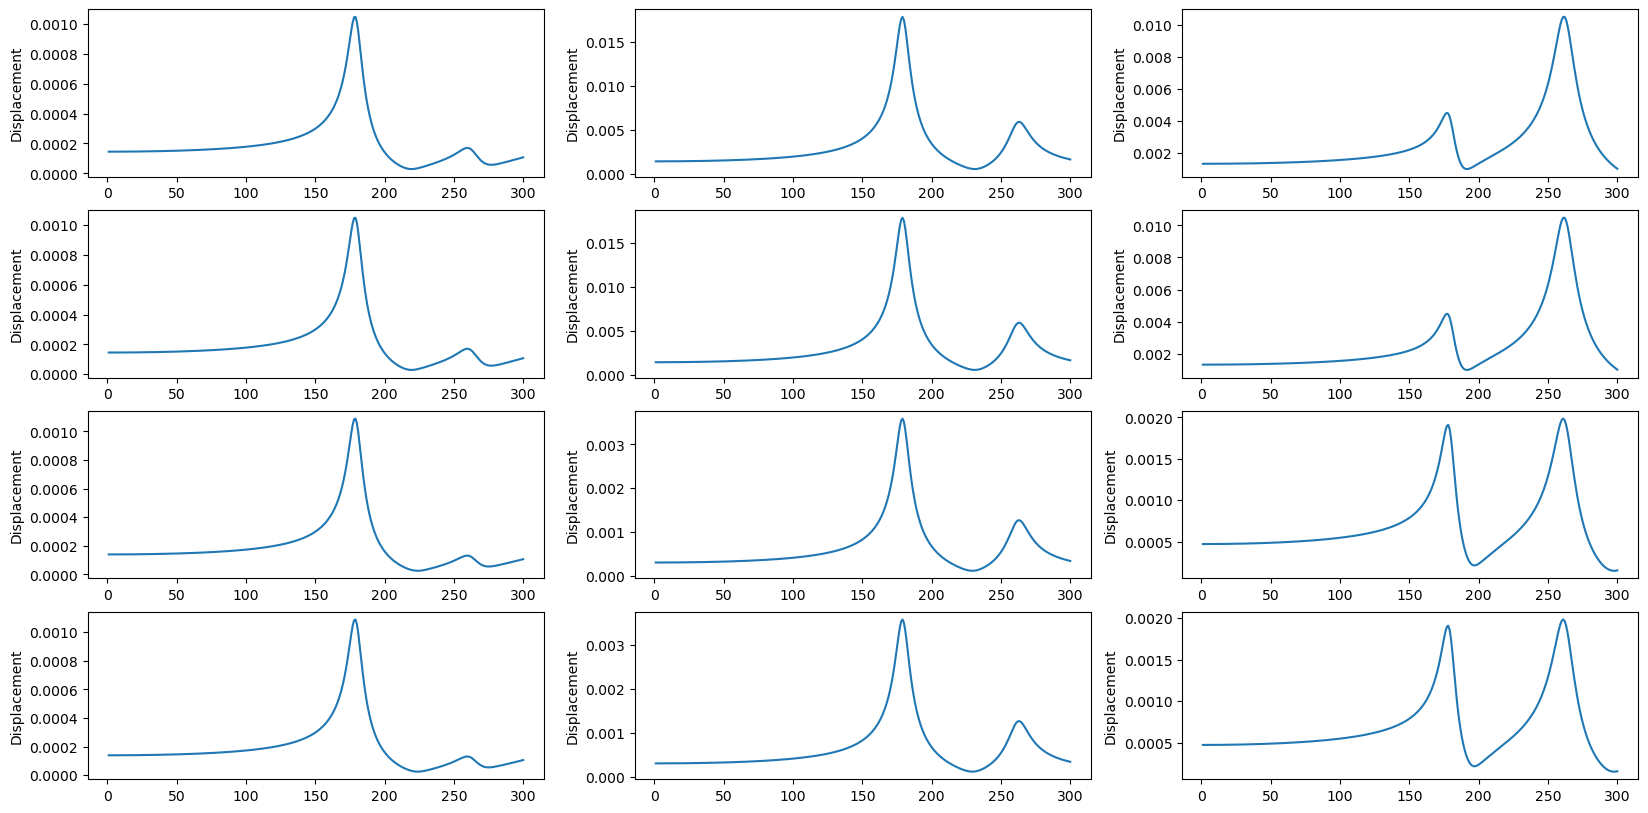

In [12]:
#Visualization: Displacement
plt.figure(figsize=(20,10))
for i in range(1,13):
    plt.subplot(4,3,i)
    plt.plot(Displacement[i])
    plt.ylabel("Displacement")

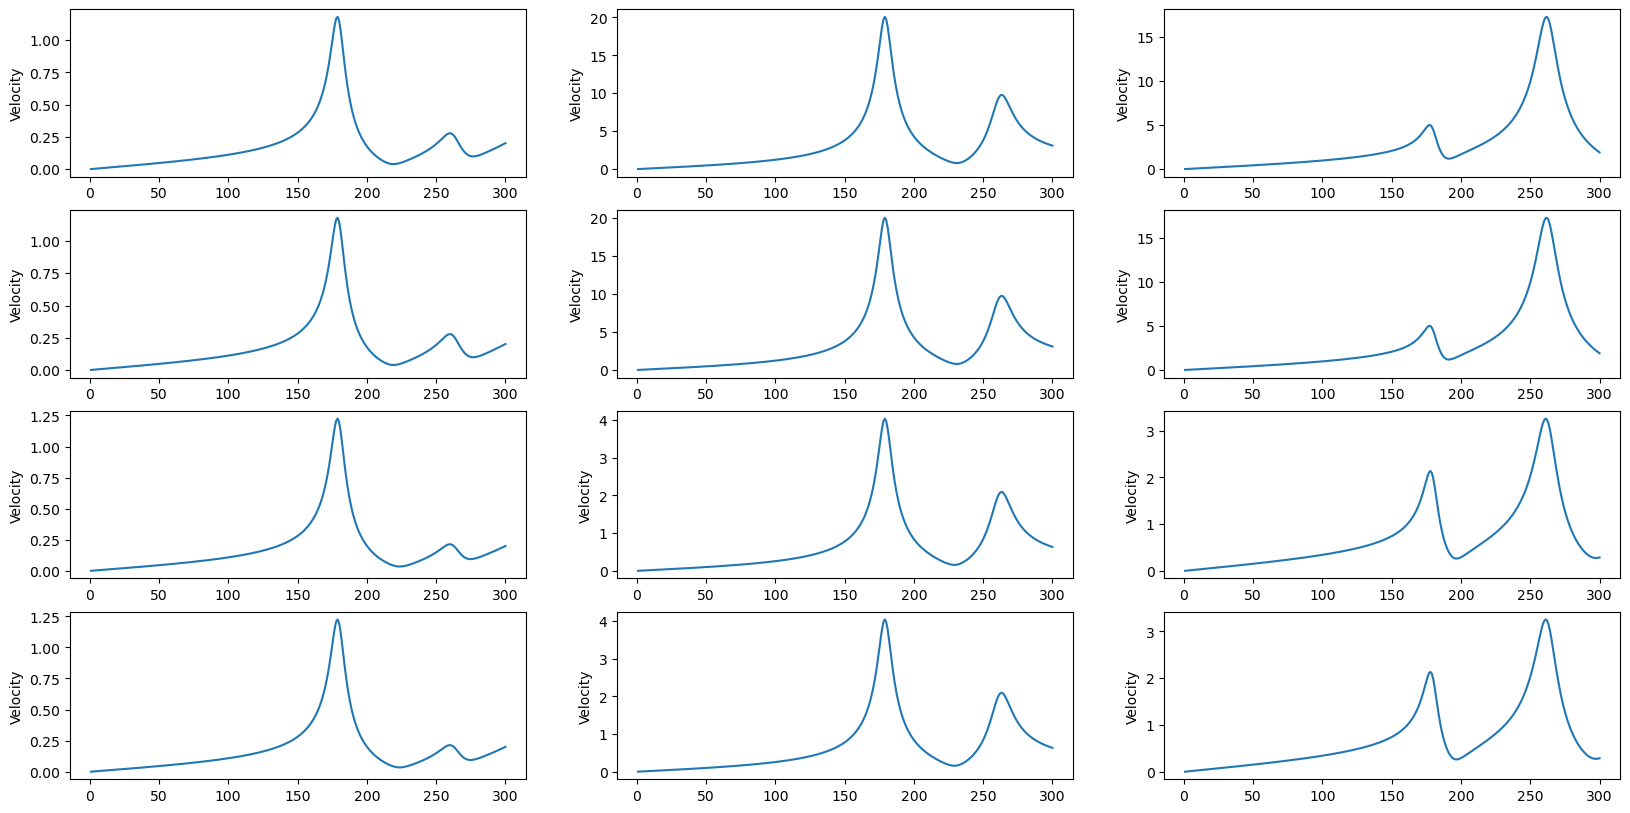

In [13]:
#Visualization: Velocity
plt.figure(figsize=(20,10))
for i in range(1,13):
    plt.subplot(4,3,i)
    plt.plot(Velocity[i])
    plt.ylabel("Velocity")

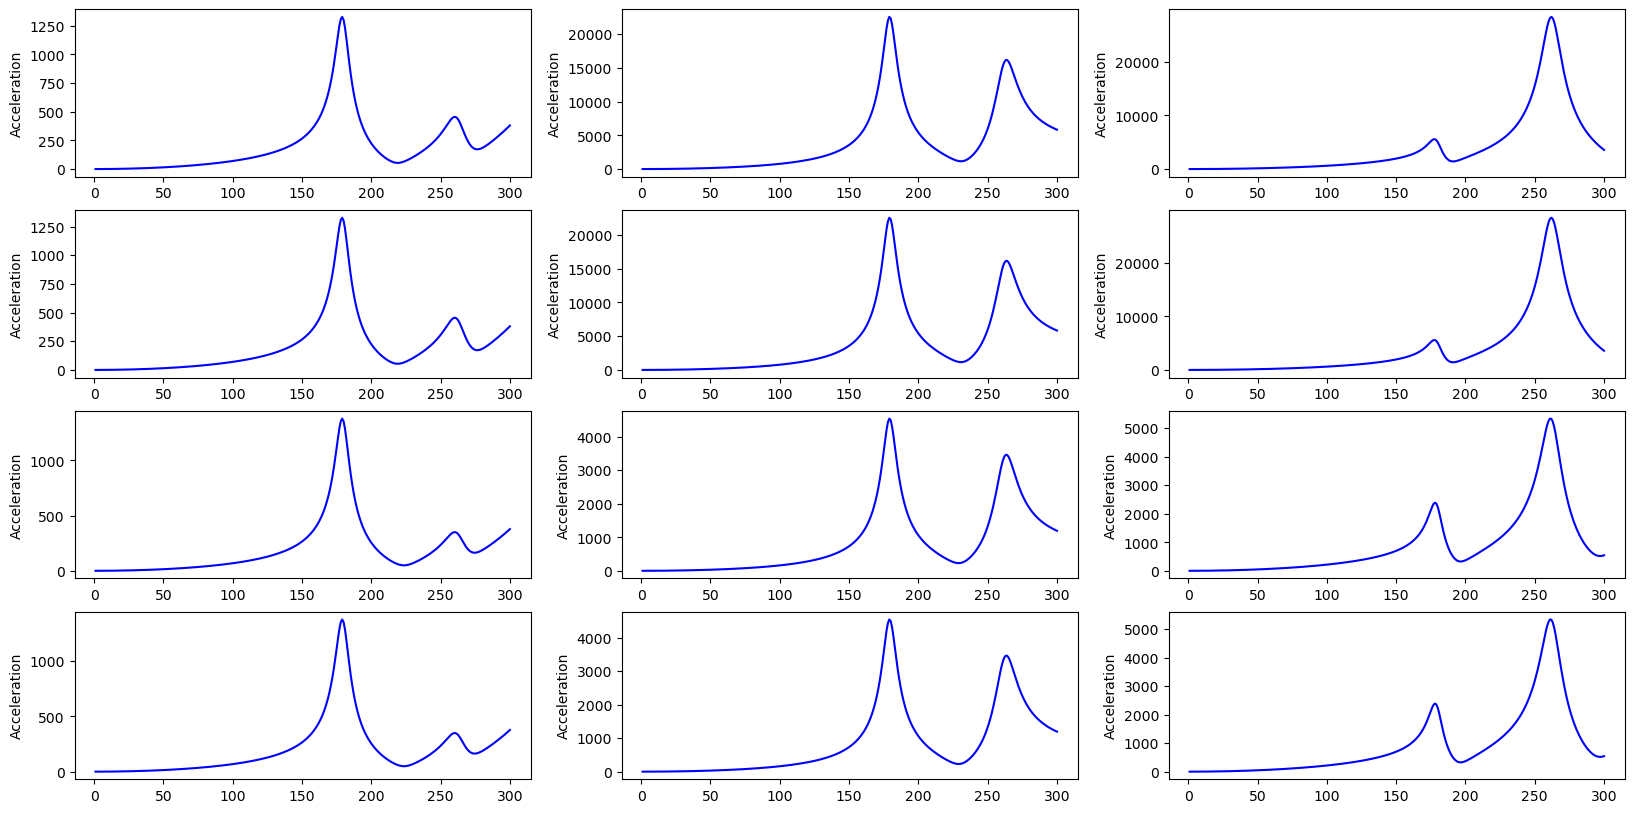

In [14]:
#Visualization: Acceleration
plt.figure(figsize=(20,10))
for i in range(1,13):
    plt.subplot(4,3,i)
    plt.plot(Acceleration[i],color="b")
    plt.ylabel("Acceleration")